In [2]:
from Peakfit import Fitter

In [3]:
import numpy as np
2*np.sqrt(2*np.log(2))

np.float64(2.3548200450309493)

In [4]:
Bob = Fitter()

[0, 10, 0, 1]
[0, 10, 0, 1]


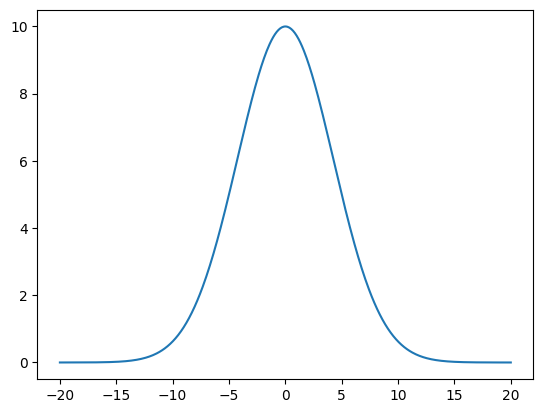

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.linspace(-20,20,500)
args = Bob.getargs()
print(args)
y = Bob.fitfunct(x,args)

plt.plot(x,y)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from Peakfit import Fitter 
def gaussnoise(x,centroid,A,FWHM,N):
    noise =np.random.random(len(x))*N
    sig = FWHM/(2*np.sqrt(2*np.log(2)))
    return A*np.exp(-((x-centroid)**2/(2*sig**2)))+noise
xstart =-3
xend  = 3 
xres = 121
x = np.linspace(xstart,xend,xres)
centroid = -1
A = 11
FWHM = 1.00
N =1
y =  gaussnoise(x,centroid,A,FWHM,N)
f = Fitter()

f.fit1d(x,y)

ax,fig = plt.subplots(1)
ax.plot(x,y)
args = f.getargs()
print(args)
fit = f.fitfunct(x,args)
ax.plot(x,fit)



[0, 10, 0, 1]


TypeError: Fitter.error_func() takes 4 positional arguments but 6 were given

In [9]:
#Message in a bottle 
#Mistakes I have Made a few 


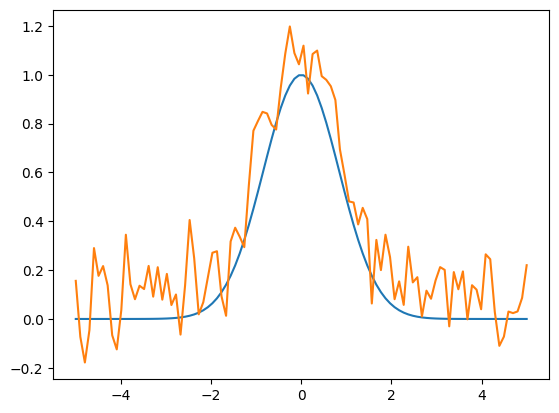

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

class GaussianComponent():

    def __init__(self, func, params=None):
        self.formula = func
        self.params = params

    def eval(self, x,params):
        allowed_locals = {key: self.params[key] for key in self.params}
        allowed_locals["x"] = x
        allowed_globals = {"np":np}
        return eval(self.formula, allowed_globals, allowed_locals)
    def Fit(self, x, y):
        FitParams, FitCov = curve_fit(self.eval, x, y, self.params)
        self.fitparams = FitParams
    def GetPlot(self,x,params):
        y = self.eval(x,params)
        return y
    


# Make a gausssian with default shape and position (height 1 at the origin, FWHM 1.
g = GaussianComponent("Amp*np.exp(-((x-Center)**2/(FWHM**2*np.sqrt(2))))", 
                      params={"Amp":1, "Center":0, "FWHM":1})


# Make a space in which we can plot the gaussian.
x = np.linspace(-5,5,100)
y = g.GetPlot(x,1)

# Make some "experimental data" which is just the default shape, noisy, and
# moved up the y axis a tad so the best fit will be different.
ynoise = y + np.random.normal(loc=0.1, scale=0.1, size=len(x))

# Draw it
plt.plot(x,y, x,ynoise)
plt.show()

# Do the fit (but this doesn't work...)
g.Fit(x,y)